In [2]:
# 이미지 정보 수집
on_light = cv2.imread('resources/L_on.jpg')
on_light_hsv = cv2.cvtColor(on_light,cv2.COLOR_BGR2HSV)
off_light = cv2.imread('resources/L_off.jpg')
off_light_hsv = cv2.cvtColor(off_light,cv2.COLOR_BGR2HSV)

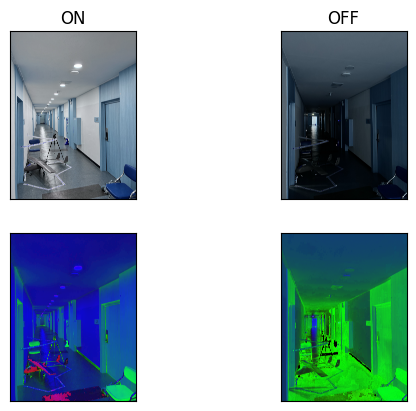

In [3]:
# 기본 이미지 출력 및 hsv 결과 출력

# light on
plt.subplot(2,2,1)
plt.title("ON")
plt.imshow(on_light)
plt.xticks([]), plt.yticks([]);
# light off
plt.subplot(2,2,2)
plt.title("OFF")
plt.imshow(off_light)
plt.xticks([]), plt.yticks([]);
# light on (graph)
plt.subplot(2,2,3)
plt.imshow(on_light_hsv,cmap='hsv')
plt.xticks([]), plt.yticks([]);
# light off (graph)
plt.subplot(2,2,4)
plt.imshow(off_light_hsv,cmap='hsv')
plt.xticks([]), plt.yticks([]);

In [4]:
# value 영역 추출
bright_arr_value = np.asarray(on_light_hsv[:,:,2])
darker_arr_value = np.asarray(off_light_hsv[:,:,2])

In [7]:
# 평균 추출
print(f"Mean of bright value : {bright_arr_value.mean()}")
print(f"Mean of darker value : {darker_arr_value.mean()}")
print(f"diff between Darker vs Bright mean : {bright_arr_value.mean() - darker_arr_value.mean()}")

Mean of bright value : 145.62140106331884
Mean of darker value : 59.904849087590286
diff between Darker vs Bright mean : 85.71655197572855


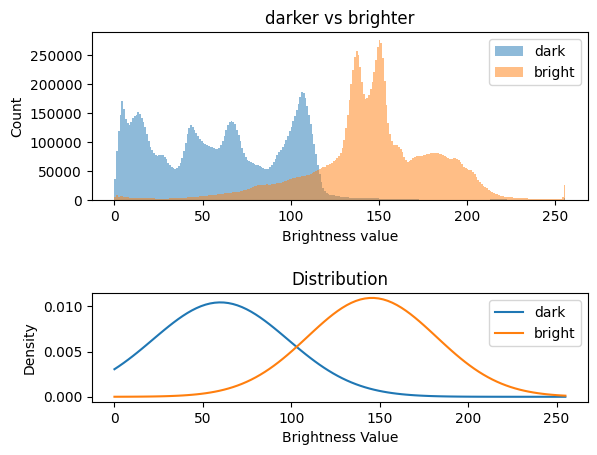

In [6]:
# 히스토그램.
plt.subplot(2,1,1)
plt.hist(darker_arr_value.ravel(),bins=256,range=(0,256),label="dark",alpha=0.5)
plt.hist(bright_arr_value.ravel(),bins=256,range=(0,256),label="bright",alpha=0.5)
plt.title("darker vs brighter")
plt.xlabel('Brightness value')
plt.ylabel('Count')
plt.legend()

bright_mean, bright_std = norm.fit(bright_arr_value.ravel())
dark_mean, dark_std = norm.fit(darker_arr_value.ravel())

# Generate range for x-axis
x = np.linspace(0, 255, 100)

# Plot normal distributions
plt.subplot(3,1,3)
plt.plot(x, norm.pdf(x, dark_mean, dark_std), label='dark')
plt.plot(x, norm.pdf(x, bright_mean, bright_std), label='bright')
plt.title('Distribution')
plt.xlabel('Brightness Value')
plt.ylabel('Density')
plt.legend()
plt.show()